In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
#spark=SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("Spark SQL basic example").getOrCreate()
sc = spark.sparkContext
import matplotlib.pyplot as plt
import pandas
from pyspark.sql.functions import *
import seaborn as sns

In [2]:
spark

In [3]:
df = spark.read.csv(r"D:\DBDA\FINAL_PROJECT\v1\vehicles.csv",header=True, inferSchema=True)

In [4]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_url: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- VIN: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- posting_date: string (nu

In [5]:
df.show(5)

+----------+--------------------+--------------------+--------------------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+----+-----+----+----+-----------+---------+-----------+------+-----+----+----+------------+
|        id|                 url|              region|          region_url|price|year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission| VIN|drive|size|type|paint_color|image_url|description|county|state| lat|long|posting_date|
+----------+--------------------+--------------------+--------------------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+----+-----+----+----+-----------+---------+-----------+------+-----+----+----+------------+
|7222695916|https://prescott....|            prescott|https://prescott....| 6000|null|        null| null|     null|     null|null|    null|        null|        null|null| null|null|null|       null|     null|       null|  null|  

In [6]:
df.columns

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [7]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the sum of null values for each column
null_counts = df.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df.columns])

# Show the counts
null_counts.show()


+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
| id| url|region|region_url|price|year|manufacturer|model|condition|cylinders| fuel|odometer|title_status|transmission|   VIN| drive|  size|  type|paint_color|image_url|description|county|state|  lat| long|posting_date|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
|  0|9884|  6901|      6533| 6446|7890|       28937|17506|   187143|   190798|16344|   17801|       21618|       15932|174486|144178|319997|106892|     143839|    13732|      13733|382283|23077|25397|24715|       22477|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+-

In [8]:
df.count()

441802

In [10]:
# Drop the independent columns :
columns_to_delete = ['id', 'url', 'region_url','VIN','image_url','description','county','lat','long','posting_date','size','state']


df1 = df.drop(*columns_to_delete)

In [11]:
df1.columns

['region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']

In [12]:
df1.count()

441802

In [13]:
# drop duplicated records :
df2 = df1.distinct()
df2.count()

376299

df3 = df1.dropDuplicates()
df3.count()

In [14]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the sum of null values for each column
null_counts = df2.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df2.columns])

# Calculate the percentage of null values for each column
total_rows = df2.count()
null_percentages = null_counts.select(
    [((col(column) / total_rows) * 100).alias(column + "_null_percentage") for column in df2.columns]
)

# Show the null percentages
null_percentages.show()


+----------------------+---------------------+--------------------+----------------------------+---------------------+-------------------------+-------------------------+--------------------+------------------------+----------------------------+----------------------------+---------------------+--------------------+---------------------------+
|region_null_percentage|price_null_percentage|year_null_percentage|manufacturer_null_percentage|model_null_percentage|condition_null_percentage|cylinders_null_percentage|fuel_null_percentage|odometer_null_percentage|title_status_null_percentage|transmission_null_percentage|drive_null_percentage|type_null_percentage|paint_color_null_percentage|
+----------------------+---------------------+--------------------+----------------------------+---------------------+-------------------------+-------------------------+--------------------+------------------------+----------------------------+----------------------------+---------------------+------------

We can see that "year", "manufacturer", "model", and "odometer" column has less than 6% of null values. So we can simply drop those rows which have null values in these two columns.

In [15]:
# Drop rows with null values in specified columns
df3 = df2.na.drop(subset=['region','price','year','model','odometer','manufacturer','transmission','title_status','fuel'])

In [16]:
df3.count()

338666

In [17]:
df3.printSchema()

root
 |-- region: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)



In [18]:
# Calculate the sum of null values for each column
null_counts = df3.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df3.columns])

# Show the counts
null_counts.show()


+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+-----+-----------+
|region|price|year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission|drive| type|paint_color|
+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+-----+-----------+
|     0|    0|   0|           0|    0|   127475|   136976|   0|       0|           0|           0|99666|70209|      94125|
+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+-----+-----------+



#### Handling Missing Values with Categorical Encoding

For all the missing values in other columns, we have just converted them in to a new category, "unknown"
In our data preprocessing pipeline, we've adopted a strategy to address missing values across various columns. When encountering missing data points in any column, we've uniformly encoded them as a new category labeled "unknown". This approach ensures that all missing values are consistently represented, enabling smoother data processing and analysis downstream.

In [19]:
# Replace null values in all columns with 'unknown'
df4 = df3.fillna('unknown')

In [21]:
# Calculate the sum of null values for each column
null_counts = df4.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df4.columns])

# Show the counts
null_counts.show()


+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+
|region|price|year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission|drive|type|paint_color|
+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+
|     0|    0|   0|           0|    0|        0|        0|   0|       0|           0|           0|    0|   0|          0|
+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+



In [22]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df4.columns:
    # Count the distinct values in the column
    distinct_count = df4.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 414
price 14689
year 117
manufacturer 51
model 21876
condition 56
cylinders 18
fuel 16
odometer 99837
title_status 16
transmission 79
drive 12
type 22
paint_color 49


### manufacturer 

In [23]:
null_count = df4.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df4.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df4.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df4.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df4.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+--------------------+-----+
|        manufacturer|count|
+--------------------+-----+
|              jaguar| 1791|
|               buick| 4667|
|          mitsubishi| 2746|
|             pontiac| 1988|
| pricing and othe...|   40|
|               lexus| 7005|
|              toyota|28244|
|            chrysler| 4939|
|               tesla|  781|
|             lincoln| 3670|
|                audi| 6683|
|              datsun|   61|
|                 bmw|12577|
|                jeep|15478|
|               dodge|10805|
|               rover| 1543|
|             hyundai| 8229|
|                ford|58558|
|          alfa-romeo|  854|
|            cadillac| 5748|
|                 ram|14240|
|               mazda| 4585|
|             ferrari|   67|
|                 kia| 6812|
|       mercedes-benz| 9864|
|             porsche| 1136|
|        aston-martin|   22|
|              saturn|  918|
|  

#### categorical variable grouping

This step can be called "categorical variable grouping". It involves grouping less frequent categories of a categorical variable into a single category to simplify the data and potentially improve model performance.

#### manufacturer :

In [24]:
from pyspark.sql.functions import when

# Define the list of top 20 manufacturers
manufacturer_values = ['nissan','honda','chevrolet','mercedes-benz','ram','dodge','ford','jeep','toyota','bmw','subaru','volkswagen','kia','cadillac','hyundai','lexus','audi','chrysler','acura','buick']

# Use when function to update the 'manufacturer' column
df5 = df4.withColumn('manufacturer', 
                   when(df4['manufacturer'].isin(manufacturer_values), df4['manufacturer'])
                   .otherwise('others'))

In [25]:
null_count = df5.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df5.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df5.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df5.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df5.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+-------------+-----+
| manufacturer|count|
+-------------+-----+
|        buick| 4667|
|        lexus| 7005|
|       toyota|28244|
|     chrysler| 4939|
|         audi| 6683|
|       others|45121|
|          bmw|12577|
|         jeep|15478|
|        dodge|10805|
|      hyundai| 8229|
|         ford|58558|
|     cadillac| 5748|
|          ram|14240|
|          kia| 6812|
|mercedes-benz| 9864|
|    chevrolet|45189|
|        honda|17657|
|   volkswagen| 8164|
|        acura| 5403|
|       nissan|15273|
|       subaru| 8010|
+-------------+-----+

None
--------------------------------------
+-------------+
| manufacturer|
+-------------+
|        buick|
|        lexus|
|       toyota|
|     chrysler|
|         audi|
|       others|
|          bmw|
|         jeep|
|        dodge|
|      hyundai|
|         ford|
|     cadillac|
|          ram|
|          kia|
|mercedes-benz|
|    chevrolet|
|  

#### region :

In [27]:
null_count = df5.filter(col("region").isNull()).count()
print("null records" ,null_count)

null_count = df5.filter(col("region").isNotNull()).count()
print("not null records" ,null_count)

total_count = df5.select('region').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df5.groupBy('region').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df5.select("region").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+--------------------+-----+
|              region|count|
+--------------------+-----+
|   central louisiana|  116|
|          western KY|  205|
|           texarkana|  189|
|       daytona beach| 1212|
|   heartland florida|  153|
|  southeast missouri|  176|
|            sandusky|  230|
|        gold country|  648|
|           pensacola|  557|
|        south jersey| 2407|
|       new hampshire| 2202|
|          san marcos|  169|
|           fairbanks|  286|
|     kansas city, MO| 2383|
|          harrisburg|  768|
|       state college|  191|
|              yakima| 1266|
|          moses lake|  649|
|huntsville / decatur| 1051|
|   northern michigan|  556|
|       south florida| 2238|
|saginaw-midland-b...|  821|
|potsdam-canton-ma...|   86|
|        northwest OK|  136|
|             jackson|  954|
| dallas / fort worth| 2436|
|  mcallen / edinburg|  790|
|         long island| 2544|
|  

+--------------------+
|              region|
+--------------------+
|           texarkana|
|        gold country|
|           fairbanks|
|huntsville / decatur|
|florence / muscle...|
|             modesto|
|     imperial county|
|       inland empire|
|              mobile|
|               chico|
|     kenai peninsula|
|           jonesboro|
|    southeast alaska|
|    mendocino county|
|            show low|
|         little rock|
|          tuscaloosa|
|    hanford-corcoran|
|          fort smith|
|  flagstaff / sedona|
+--------------------+
only showing top 20 rows

414


In [28]:
from pyspark.sql.functions import when

# Count the occurrences of each manufacturer value
manufacturer_counts = df5.groupBy('region').count()

# Sort the counts in descending order and select the top 20 manufacturers
top_manufacturers = manufacturer_counts.orderBy('count', ascending=False).limit(50)

# Extract the top 20 manufacturer values
manufacturer_values = [row['region'] for row in top_manufacturers.collect()]

# Use when function to update the 'manufacturer' column
df6 = df5.withColumn('region', 
                     when(df5['region'].isin(manufacturer_values), df5['region'])
                     .otherwise('others'))


In [29]:
null_count = df6.filter(col("region").isNull()).count()
print("null records" ,null_count)

null_count = df6.filter(col("region").isNotNull()).count()
print("not null records" ,null_count)

total_count = df6.select('region').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df6.groupBy('region').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df6.select("region").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+--------------------+------+
|              region| count|
+--------------------+------+
|        south jersey|  2407|
|     kansas city, MO|  2383|
| dallas / fort worth|  2436|
|         long island|  2544|
|             atlanta|  2444|
|        jacksonville|  2511|
|             chicago|  2532|
|      seattle-tacoma|  2659|
|              denver|  2637|
|      tampa bay area|  2445|
|            stockton|  2468|
|           charlotte|  2367|
|          cincinnati|  2301|
|       orange county|  2465|
|        st louis, MO|  2359|
|    colorado springs|  2386|
|               boise|  2303|
|              boston|  2598|
|          pittsburgh|  2458|
|             orlando|  2426|
|           cleveland|  2284|
|           milwaukee|  2400|
|        grand rapids|  2519|
|              others|215680|
|               tulsa|  2272|
|      washington, DC|  2480|
|       oklahoma city|  2330|
| 

In [30]:
#### model :

In [31]:
null_count = df6.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df6.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df6.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df6.groupBy('model').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df6.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|             4runner|  899|
|       sonata hybrid|   73|
|                hr-v|  141|
|                 dts|  238|
|            lacrosse|  349|
|          crv lx awd|   22|
|         verano base|    8|
|transit connect c...|   26|
|           sentra sv|  132|
|  cherokee trailhawk|   25|
|journey r/t flexible|    2|
|           pruis two|    2|
|                 hse|   54|
|silverado 2500hd ...|    5|
|                 xk8|   25|
|          charger se|   50|
|journey se sport ...|   34|
|            aerostar|    5|
|      avalon limited|   58|
|           cts sedan|   42|
|                 q40|    8|
|      f-150 long bed|    1|
|               azera|   49|
|silverado durmax ...|   12|
|        slt crew cab|    4|
|explorer limited 4wd|   12|
|xc60 t6 momentum ...|   11|
|             borrego|   16|
|  

+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                 dts|
|           cts sedan|
|                 hse|
|super duty f-350 ...|
|                 xk8|
|                hr-v|
|       sonata hybrid|
|          charger se|
|      avalon limited|
|         2500 diesel|
|               gem 2|
|               azera|
|transit connect c...|
|  cherokee trailhawk|
|   eclipse cross sel|
|           sentra sv|
|          crv lx awd|
|                m 37|
+--------------------+
only showing top 20 rows

21876


In [32]:
from pyspark.sql.functions import when

# Count the occurrences of each model value
manufacturer_counts = df6.groupBy('model').count()

# Sort the counts in descending order and select the top 50 model
top_manufacturers = manufacturer_counts.orderBy('count', ascending=False).limit(50)

# Extract the top 50 model values
manufacturer_values = [row['model'] for row in top_manufacturers.collect()]

# Use when function to update the 'model' column
df7 = df6.withColumn('model',
                     when(df6['model'].isin(manufacturer_values), df6['model'])
                     .otherwise('others'))


In [31]:
null_count = df7.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df7.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df7.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df7.groupBy('model').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df7.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+------------------+------+
|             model| count|
+------------------+------+
|              1500|  3322|
|            sentra|  1041|
|  silverado 2500hd|  1282|
|            altima|  2124|
|            sierra|  1035|
|     grand caravan|  1327|
|            camaro|  1005|
|          forester|  1111|
|            fusion|  1540|
|             prius|  1207|
|         silverado|  2464|
|             jetta|  1184|
|            tacoma|  1996|
|            tundra|  1157|
|          suburban|   915|
|            sonata|  1316|
|             tahoe|  1390|
|              2500|  2233|
|            others|255292|
|           corolla|  1740|
|             focus|  1462|
|       sierra 1500|  1308|
|              cr-v|  1585|
|          wrangler|  2111|
|            sienna|   900|
|            escape|  2223|
|             rogue|  1021|
|              3500|  1258|
|             cruze|  1235|
|     

####  unique records :

In [33]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df7.columns:
    # Count the distinct values in the column
    distinct_count = df7.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 14689
year 117
manufacturer 21
model 51
condition 56
cylinders 18
fuel 16
odometer 99837
title_status 16
transmission 79
drive 12
type 22
paint_color 49


#### transmission :

In [34]:
null_count = df7.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df7.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df7.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df7.groupBy('transmission').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df7.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338666
total count  338666
--------------------------------------
+--------------------+------+
|        transmission| count|
+--------------------+------+
| and smog fees   ...|     1|
|           automatic|261721|
|               other| 58105|
|2021-05-01T11:30:...|     1|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|              manual| 18763|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|2021-05-02T13:04:...|     1|
|2021-05-02T14:34:...|     1|
| and smog fees   ...|     1|
|2021-04-27T14:34:...|     1|
|2021-05-03T15:20:...|     1|
|2021-05-01T13:05:...|     1|
| and smog fees   ...|     1|
|2021-04-27T15:19:...|     1|
| and smog fees   ...|     1|
|2021-05-02T15:19:...|     1|
| and smog fees   ...|     1|
|2021-05-01T15:19:...|     1|
|2021-04-27T09:58:...|     1|
| Si se encuentra ...|     1|
|2021-05-02T12:19:...|     1|
|2021-05-03T12:20:...|     1|
|2021-05-01T13:50:...|     1|
| and smog fees   ...|     1|
| 

In [35]:
#Define a list of values to match
names_to_match = ['automatic','manual','other','unknown']
 
#Filter DataFrame to select rows where name is in the list of values or is null
df8 = df7.filter((col("transmission").isin(names_to_match)) )

In [36]:
null_count = df8.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('transmission').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338589
total count  338589
--------------------------------------
+------------+------+
|transmission| count|
+------------+------+
|   automatic|261721|
|       other| 58105|
|      manual| 18763|
+------------+------+

None
--------------------------------------
+------------+
|transmission|
+------------+
|   automatic|
|       other|
|      manual|
+------------+

3


#### drive:

In [37]:
null_count = df8.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('drive').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338589
total count  338589
--------------------------------------
+-------+------+
|  drive| count|
+-------+------+
|unknown| 99625|
|    fwd| 85328|
|    rwd| 47623|
|    4wd|106013|
+-------+------+

None
--------------------------------------
+-------+
|  drive|
+-------+
|unknown|
|    fwd|
|    rwd|
|    4wd|
+-------+

4


In [38]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df8.columns:
    # Count the distinct values in the column
    distinct_count = df8.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 14679
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 5
odometer 99827
title_status 6
transmission 3
drive 4
type 14
paint_color 13


#### year:

In [40]:
null_count = df8.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338589
total count  338589
--------------------------------------
+----+-----+
|year|count|
+----+-----+
|1953|   55|
|1957|  117|
|1987|  393|
|1956|   98|
|2016|23369|
|1936|   21|
|2020|16673|
|2012|18409|
|1958|   49|
|1943|    1|
|1915|    1|
|1972|  297|
|1931|   26|
|1988|  402|
|1926|   10|
|1938|   14|
|2019|21483|
|2017|29395|
|1932|   46|
|1977|  198|
+----+-----+
only showing top 20 rows

None
--------------------------------------
+----+
|year|
+----+
|1953|
|1957|
|1987|
|1956|
|2016|
|1936|
|2020|
|2012|
|1958|
|1972|
|1931|
|1988|
|1938|
|2019|
|1918|
|2017|
|1932|
|1977|
|2014|
|1971|
+----+
only showing top 20 rows

107


In [41]:
df8.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: string (nullable = false)
 |-- year: string (nullable = false)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: string (nullable = false)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



In [45]:
# converting odometer to integer type:

# Convert data type from string to integer
df9 = df8.withColumn("year", col('year').cast("int"))

# Show the DataFrame schema to verify the changes
df9.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: string (nullable = false)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: string (nullable = false)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



#### odometer :

In [46]:
null_count = df9.filter(col("odometer").isNull()).count()
print("null records" ,null_count)

null_count = df9.filter(col("odometer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df9.select('odometer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df9.groupBy('odometer').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df9.select("odometer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 338589
total count  338589
--------------------------------------
+--------+-----+
|odometer|count|
+--------+-----+
|   68325|    2|
|   80305|    5|
|   81206|    3|
|  168100|    4|
|  124592|    1|
|  137269|    4|
|   72472|    2|
|  114404|    4|
|  100010|    9|
|  131033|    3|
|   28675|    1|
|    7711|   59|
|    6240|    3|
|   87626|    1|
|   71627|    1|
|  106506|    1|
|   33174|   20|
|  125702|    1|
|   31432|    3|
|   61304|    2|
+--------+-----+
only showing top 20 rows

None
--------------------------------------
+--------+
|odometer|
+--------+
|   88140|
|  131033|
|  158371|
|  124592|
|   97935|
|   12394|
|   86180|
|   39457|
|   18992|
|   35444|
|    1159|
|   81206|
|   29912|
|   89555|
|  167438|
|  138004|
|   51550|
|   80305|
|   91959|
|   65495|
+--------+
only showing top 20 rows

99827


In [47]:
# converting odometer to integer type:

# Convert data type from string to integer
df10 = df9.withColumn("odometer", col('odometer').cast("int"))

# Show the DataFrame schema to verify the changes
df10.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: string (nullable = false)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



#### PRICE :

In [48]:
# converting price to integer type:

# Convert data type from string to integer
df11 = df10.withColumn("price", col('price').cast("int"))

# Show the DataFrame schema to verify the changes
df11.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



In [49]:
df11.show(10)

+------+-----+----+------------+------+---------+-----------+------+--------+------------+------------+-------+-------+-----------+
|region|price|year|manufacturer| model|condition|  cylinders|  fuel|odometer|title_status|transmission|  drive|   type|paint_color|
+------+-----+----+------------+------+---------+-----------+------+--------+------------+------------+-------+-------+-----------+
|others|39590|2020|        ford|others|     good|8 cylinders|   gas|    1419|       clean|       other|    rwd|  coupe|      white|
|others| 3850|2010|  volkswagen| jetta|  unknown|    unknown|   gas|  178000|       clean|   automatic|unknown|unknown|    unknown|
|others|45950|2014|      others|others|excellent|8 cylinders|diesel|  154289|       clean|   automatic|    4wd|  truck|      black|
|others| 5000|2006|        jeep|others|  unknown|    unknown|diesel|  194000|       clean|   automatic|unknown|    SUV|    unknown|
|others|    0|2016|         ram|others| like new|6 cylinders|diesel|  128377

In [50]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df11.columns:
    # Count the distinct values in the column
    distinct_count = df11.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 14677
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 5
odometer 99827
title_status 6
transmission 3
drive 4
type 14
paint_color 13


### Handling outliers :

Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.

#### price

In [51]:
df11.count()

338589

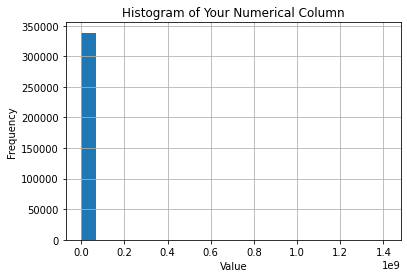

In [52]:
pandas_df = df11.select("price").toPandas()

# Plot histogram using Pandas
pandas_df.hist(bins=20)  # Adjust bins as needed
plt.title("Histogram of Your Numerical Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

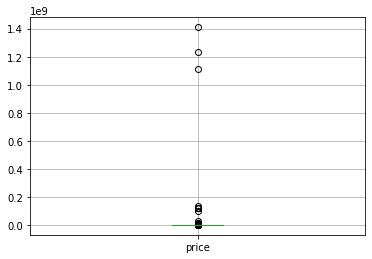

In [53]:
numerical_column = 'price'

# Extract the numerical column and convert it to a Pandas DataFrame
pandas_df = df11.select(numerical_column).toPandas()

# Create a boxplot using Pandas
pandas_df.boxplot(column=numerical_column)

# Display the plot
plt.show()

In [54]:
# Calculate quartiles
price_percentiles = df11.approxQuantile("price", [0.15, 0.75], 0.01)  # Use a low relative error for better accuracy
price_percentile15 = price_percentiles[0]
price_percentile75 = price_percentiles[1]

# Calculate IQR and upper/lower limits
price_iqr = price_percentile75 - price_percentile15
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = price_percentile15

# Filter DataFrame based on limits
df12 = df11.filter((col("price") < price_upper_limit) & (col("price") > price_lower_limit))


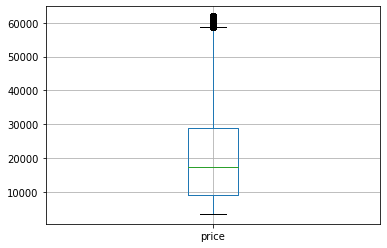

In [55]:
numerical_column = 'price'

# Extract the numerical column and convert it to a Pandas DataFrame
pandas_df = df12.select(numerical_column).toPandas()

# Create a boxplot using Pandas
pandas_df.boxplot(column=numerical_column)

# Display the plot
plt.show()

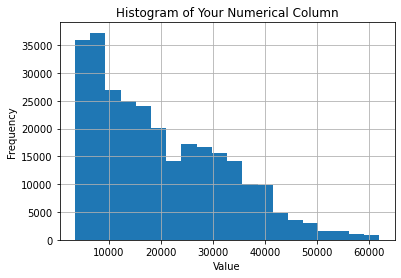

In [56]:
pandas_df = df12.select("price").toPandas()

# Plot histogram using Pandas
pandas_df.hist(bins=20)  # Adjust bins as needed
plt.title("Histogram of Your Numerical Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [57]:
df12.count()

283296

odometer :

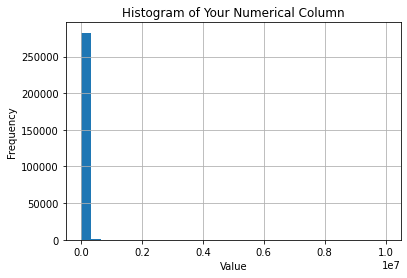

In [58]:
pandas_df = df12.select("odometer").toPandas()

# Plot histogram using Pandas
pandas_df.hist(bins=30)  # Adjust bins as needed
plt.title("Histogram of Your Numerical Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

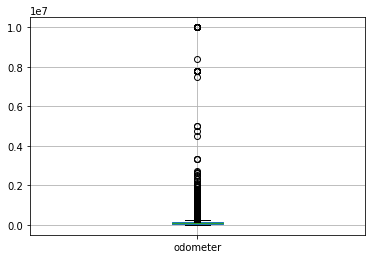

In [59]:
numerical_column = 'odometer'

# Extract the numerical column and convert it to a Pandas DataFrame
pandas_df = df12.select(numerical_column).toPandas()

# Create a boxplot using Pandas
pandas_df.boxplot(column=numerical_column)

# Display the plot
plt.show()

In [60]:
# Calculate percentiles
odometer_percentiles = df12.approxQuantile("odometer", [0.05, 0.25, 0.75], 0.01)  # Use a low relative error for better accuracy
odometer_percentile05 = odometer_percentiles[0]
odometer_percentile25 = odometer_percentiles[1]
odometer_percentile75 = odometer_percentiles[2]

# Calculate IQR and upper/lower limits
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = odometer_percentile05

# Filter DataFrame based on limits
df13 = df12.filter((col("odometer") < odometer_upper_limit) & (col("odometer") > odometer_lower_limit))


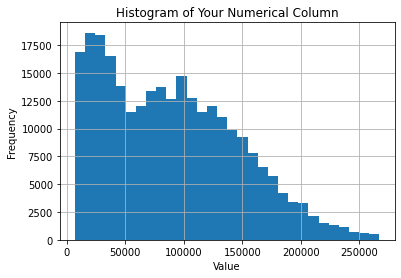

In [61]:
pandas_df = df13.select("odometer").toPandas()

# Plot histogram using Pandas
pandas_df.hist(bins=30)  # Adjust bins as needed
plt.title("Histogram of Your Numerical Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

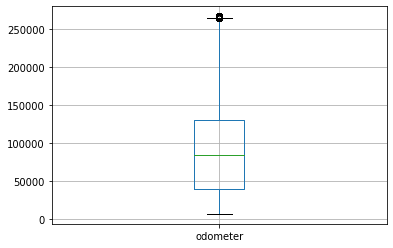

In [62]:
numerical_column = 'odometer'

# Extract the numerical column and convert it to a Pandas DataFrame
pandas_df = df13.select(numerical_column).toPandas()

# Create a boxplot using Pandas
pandas_df.boxplot(column=numerical_column)

# Display the plot
plt.show()

In [63]:
df13.count()

267802

# Feature Engineering :

 year :

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

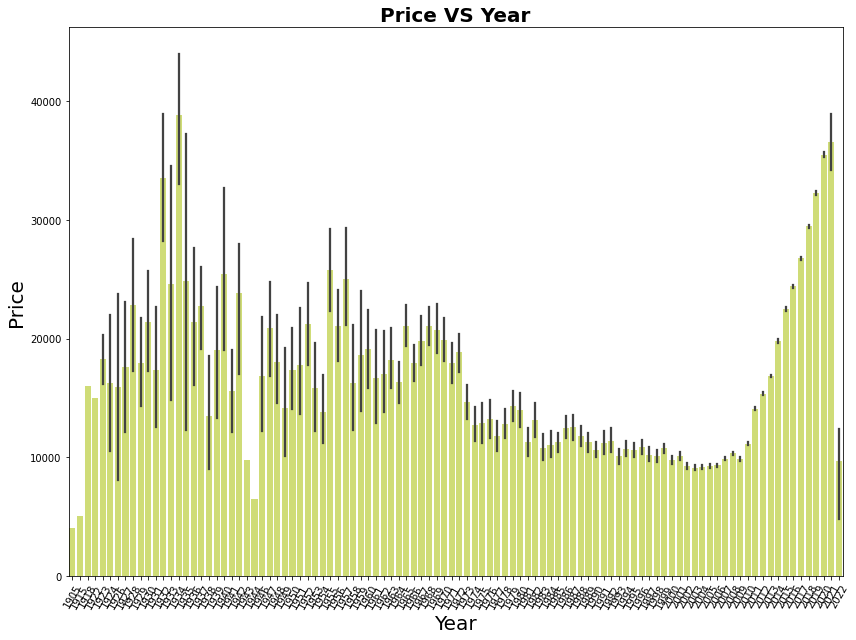

In [65]:
new_df = df13.select("price","year").toPandas()

# Set up plot parameters
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize=(12, 9))

# Plot
sns.barplot(y=new_df['price'], x=new_df['year'])
plt.title("Price VS Year", fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=20)
plt.xticks(rotation=60)
plt.ylabel('Price', fontsize=20)
plt.tight_layout()
plt.show()

We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996

In [66]:
df13.count()

267802

In [67]:
# Filter DataFrame based on the condition
df14 = df13.where(df13['year'] > 1996)

In [68]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df14.columns:
    # Count the distinct values in the column
    distinct_count = df14.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 12243
year 26
manufacturer 21
model 51
condition 7
cylinders 9
fuel 5
odometer 82190
title_status 6
transmission 3
drive 4
type 14
paint_color 13


In [69]:
df14.count()

259083

In [70]:
# Calculate car age and add it as a new column
df15 = df14.withColumn('car_age', 2022 - col('year'))

# Drop the 'year' column
df16 = df15.drop('year')

# Describe the DataFrame to get summary statistics
df16.describe().show()

+-------+--------------+------------------+------------+------------------+---------+------------+------+-----------------+------------+------------+-------+------+-----------+-----------------+
|summary|        region|             price|manufacturer|             model|condition|   cylinders|  fuel|         odometer|title_status|transmission|  drive|  type|paint_color|          car_age|
+-------+--------------+------------------+------------+------------------+---------+------------+------+-----------------+------------+------------+-------+------+-----------+-----------------+
|  count|        259083|            259083|      259083|            259083|   259083|      259083|259083|           259083|      259083|      259083| 259083|259083|     259083|           259083|
|   mean|          null|19773.954130529597|        null|2158.6062452399087|     null|        null|  null|89852.14206644203|        null|        null|   null|  null|       null|9.043129035868814|
| stddev|          null|1

In [71]:
df16.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)
 |-- car_age: integer (nullable = true)



In [72]:
df16.count()

259083

In [73]:
# Save DataFrame to a single CSV file
df16.coalesce(1).write.csv("file:///D:/DBDA/new_vehicle_EDA2.csv", header=True)

AnalysisException: path file:/D:/DBDA/new_vehicle_EDA2.csv already exists.

## Data Visualization

 ploting pair-plot :  distribution

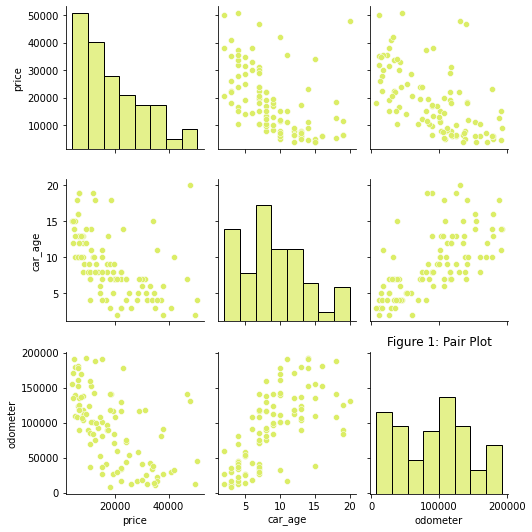

In [74]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df16.select("price","car_age",'odometer','fuel','condition').toPandas()

sample_data = pandas_df.sample(100)

# Create pair plot using seaborn
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()

# Display the plot
plt.show()

ploting heatmap : correlation 
negative--> inversely proportional

<AxesSubplot:>

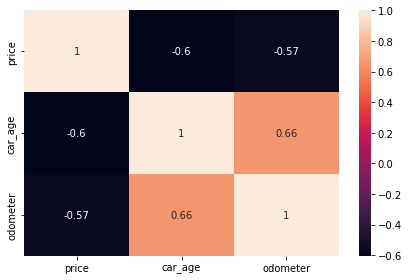

In [75]:
sns.heatmap(pandas_df.corr(), annot=True)

 subplots :

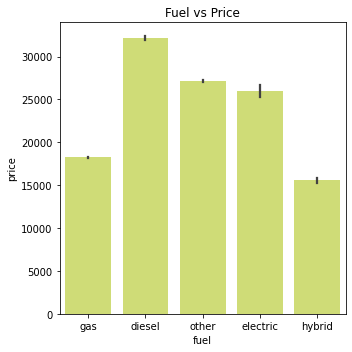

In [76]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=pandas_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

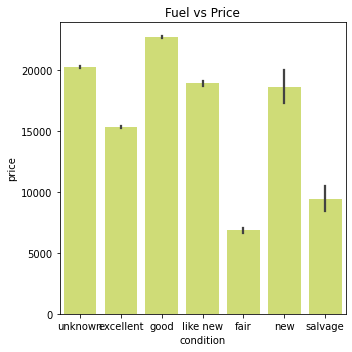

In [77]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='condition',y='price',data=pandas_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

 barplot :

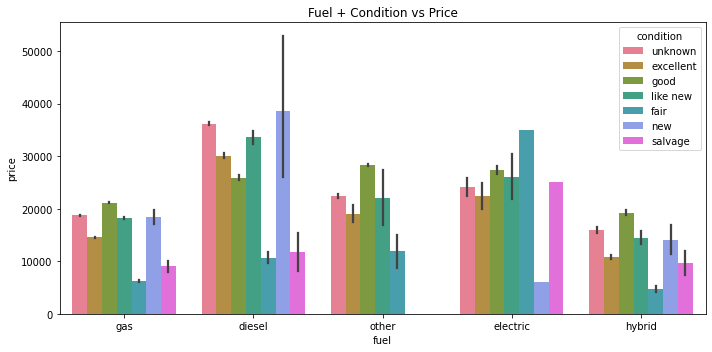

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=pandas_df)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

# Model Training :

In [79]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler,StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

train, test = df16.randomSplit([0.75, 0.25])

numerical=["odometer","car_age"]

numerical_vector_assembler = VectorAssembler(inputCols=numerical,
                                             outputCol='numerical_feature_vector')

train = numerical_vector_assembler.transform(train)
test = numerical_vector_assembler.transform(test)


scaler = StandardScaler(inputCol='numerical_feature_vector',
                        outputCol='scaled_numerical_feature_vector',
                        withStd=True, withMean=True)

scaler = scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)


indexer = StringIndexer(inputCols=['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','region'],
                        outputCols=['manufacturer_index','m_i','co_i','cy_i','f_i','ts_i','tr_i','d_i','ty_i','p_i','r_i'],handleInvalid="keep")

indexer = indexer.fit(train)
train = indexer.transform(train)
test = indexer.transform(test)



one_hot_encoder = OneHotEncoder(inputCols=['manufacturer_index','m_i','co_i','cy_i','f_i','ts_i','tr_i','d_i','ty_i','p_i','r_i'],
                                outputCols=['manufacturer_index_h','m_i_h','co_i_h','cy_i_h','f_i_h','ts_i_h','tr_i_h','d_i_h','ty_i_h','p_i_h','r_i_h'])

one_hot_encoder = one_hot_encoder.fit(train)

train = one_hot_encoder.transform(train)
test = one_hot_encoder.transform(test)

assembler = VectorAssembler(inputCols=['scaled_numerical_feature_vector',
                                       'manufacturer_index_h','m_i_h','co_i_h','cy_i_h','f_i_h','ts_i_h','tr_i_h','d_i_h','ty_i_h','p_i_h','r_i_h'],
                            outputCol='final_feature_vector')

train = assembler.transform(train)
test = assembler.transform(test)



lr = LinearRegression(featuresCol='final_feature_vector',
                      labelCol='price')


lr=lr.fit(train)
pred_train_df = lr.transform(train).withColumnRenamed('prediction',
                                                      'predicted_vehicle_value')

pred_train_df.show(5)

pred_test_df = lr.transform(test).withColumnRenamed('prediction','predicted_vehicle_value')

result=lr.evaluate(test)
print(result.r2)
unlabeled_data=test.select("final_feature_vector")
predictions=lr.transform(unlabeled_data)
predictions.show(20)

+-----------+-----+------------+------+---------+-----------+----+--------+------------+------------+-------+-------+-----------+-------+------------------------+-------------------------------+------------------+----+----+----+---+----+----+---+----+---+----+--------------------+---------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+---------------+--------------------+-----------------------+
|     region|price|manufacturer| model|condition|  cylinders|fuel|odometer|title_status|transmission|  drive|   type|paint_color|car_age|numerical_feature_vector|scaled_numerical_feature_vector|manufacturer_index| m_i|co_i|cy_i|f_i|ts_i|tr_i|d_i|ty_i|p_i| r_i|manufacturer_index_h|          m_i_h|       co_i_h|       cy_i_h|        f_i_h|       ts_i_h|       tr_i_h|        d_i_h|        ty_i_h|         p_i_h|          r_i_h|final_feature_vector|predicted_vehicle_value|
+-----------+-----+------------+------+---------+-----